In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_rows", 30)

In [5]:
df = pd.read_html("https://www.worldfootball.net/schedule/ita-serie-a-1990-1991-spieltag/34/")[3]
df["Year"] = 1990
for year in range(1991, 2004):
    my_url = "https://www.worldfootball.net/schedule/ita-serie-a-{}-{}-spieltag/34/".format(year, year+1)
    df_temp = pd.read_html(my_url)[3]
    df_temp["Year"] = year
    df = pd.concat([df, df_temp])

In [6]:
for year in range(1994, 2020):
    my_url = "https://www.worldfootball.net/schedule/ita-serie-a-{}-{}-spieltag/38/".format(year, year+1)
    df_temp = pd.read_html(my_url)[3]
    df_temp["Year"] = year
    df = pd.concat([df, df_temp])

In [7]:
df = df[df['#'].notna()]

In [8]:
df['#'].value_counts()

10.0    30
9.0     30
2.0     30
3.0     30
4.0     30
5.0     30
6.0     30
7.0     30
8.0     30
1.0     30
11.0    30
12.0    30
13.0    30
14.0    30
15.0    30
16.0    30
17.0    30
18.0    30
19.0    16
20.0    16
Name: #, dtype: int64

In [9]:
df.head()

,#,Team,Team.1,M.,W,D,L,goals,Dif.,Pt.,Year,0,1
0,1.0,NaN,Sampdoria,34.0,20.0,11.0,3.0,57:24,33.0,51:17,1990,NaN,NaN
1,2.0,NaN,AC Milan,34.0,18.0,10.0,6.0,46:19,27.0,46:22,1990,NaN,NaN
2,3.0,NaN,Inter,34.0,18.0,10.0,6.0,56:31,25.0,46:22,1990,NaN,NaN
3,4.0,NaN,Genoa CFC,34.0,14.0,12.0,8.0,51:36,15.0,40:28,1990,NaN,NaN
4,5.0,NaN,Torino FC,34.0,12.0,14.0,8.0,40:29,11.0,38:30,1990,NaN,NaN


In [10]:
df.columns

Index([     '#',   'Team', 'Team.1',     'M.',      'W',      'D',      'L',
        'goals',   'Dif.',    'Pt.',   'Year',        0,        1],
      dtype='object')

In [11]:
df = df[['#', 'Dif.', 'Team.1', 'Year']]

In [12]:
df

,#,Dif.,Team.1,Year
0,1.0,33.0,Sampdoria,1990
1,2.0,27.0,AC Milan,1990
2,3.0,25.0,Inter,1990
3,4.0,15.0,Genoa CFC,1990
4,5.0,11.0,Torino FC,1990
...,...,...,...,...
15,16.0,-22.0,Torino FC,2019
16,17.0,-26.0,Genoa CFC,2019
17,18.0,-33.0,US Lecce,2019
18,19.0,-44.0,Brescia Calcio,2019


In [13]:
df.columns = ['Standing', 'GD', 'Team', 'Year']

In [14]:
df

,Standing,GD,Team,Year
0,1.0,33.0,Sampdoria,1990
1,2.0,27.0,AC Milan,1990
2,3.0,25.0,Inter,1990
3,4.0,15.0,Genoa CFC,1990
4,5.0,11.0,Torino FC,1990
...,...,...,...,...
15,16.0,-22.0,Torino FC,2019
16,17.0,-26.0,Genoa CFC,2019
17,18.0,-33.0,US Lecce,2019
18,19.0,-44.0,Brescia Calcio,2019


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# dependant variable - what we are trying to predict
y = df.Standing

# independant - what we want to predict from
x = df.GD.values.reshape(-1,1)

In [18]:
print(x.shape, y.shape)

(572, 1) (572,)


In [19]:
model = LinearRegression().fit(x,y)

In [20]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [21]:
print(r_sq)

0.8403956957542305


Equation of a straight line is : **y = mx + b**  
Where **b** is the intercept and **m** is the slope.


In [22]:
y_pred = intercept + slope*x

In [23]:
print(intercept)
# Each GD change influences your standing by around 0.23
print(slope[0])

10.05944055944056
-0.23227626942702168


In [24]:
np.arange(0,21,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

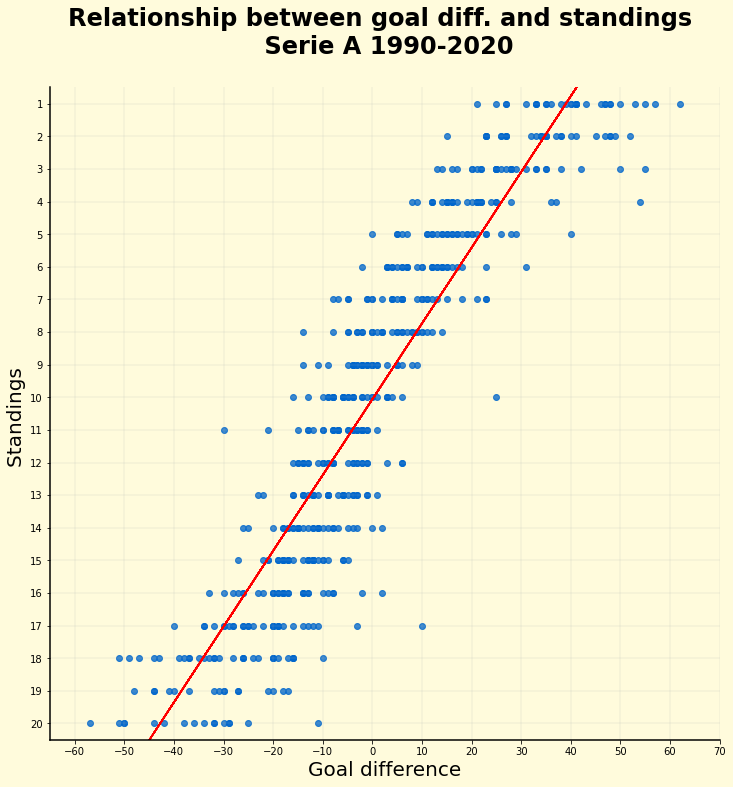

In [25]:
fig, ax = plt.subplots(figsize= (12,12), facecolor='#fffbdc')
ax.set_facecolor('#fffbdc')
plt.scatter(x,y, alpha=0.8, c="#0066cc")
plt.plot(x, y_pred, c="red")


ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.yticks(np.arange(0,21,1))
plt.xticks(np.arange(-70,71,10))

plt.ylim(0.5, 20.5)
plt.xlim(-65, 70)

plt.grid(axis = 'x', linewidth = 0.2)
plt.grid(axis = 'y', linewidth = 0.2)

plt.gca().invert_yaxis()

plt.xlabel("Goal difference", fontsize=20)
plt.ylabel("Standings ", fontsize=20)
sns.despine()
plt.title("Relationship between goal diff. and standings \n Serie A 1990-2020\n",fontdict= { 'fontsize': 24, 'fontweight':'bold'});

In [26]:
plt.rcParams['font.family']

['sans-serif']

In [27]:
df.sort_values("GD",ascending=False).head(1)

,Standing,GD,Team,Year
0,1.0,62.0,Juventus,2017


In [28]:
df.sort_values("GD",ascending=True).head(1)

,Standing,GD,Team,Year
19,20.0,-57.0,Pescara Calcio,2012


In [29]:
df[(df["Standing"]==4) & (df["GD"]>50)]

,Standing,GD,Team,Year
3,4.0,54.0,AC Milan,2005


In [30]:
df[(df["Standing"]==10) & (df["GD"]>20)]

,Standing,GD,Team,Year
9,10.0,25.0,ACF Fiorentina,2005


In [31]:
df[(df["Standing"]==11) & (df["GD"]<-25)]

,Standing,GD,Team,Year
10,11.0,-30.0,Sassuolo Calcio,2017


In [32]:
df[(df["Standing"]==17) & (df["GD"]>=10)]

,Standing,GD,Team,Year
16,17.0,10.0,Lazio Roma,2005


In [33]:
df[(df["Standing"]==20) & (df["GD"]>=-20)]

,Standing,GD,Team,Year
19,20.0,-11.0,Atalanta,2004


In [34]:
df = df[df["Year"] != 2005]

In [35]:
# dependant variable - what we are trying to predict
y = df.Standing

# independant - what we want to predict from
x = df.GD.values.reshape(-1,1)

In [36]:
model = LinearRegression().fit(x,y)

In [37]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [38]:
print(r_sq)

0.8522681919688677


In [39]:
y_pred = intercept + slope*x

In [40]:
print(intercept)
# Each GD change influences your standing by around 0.23
print(slope[0])

10.043478260869565
-0.2348217362999272


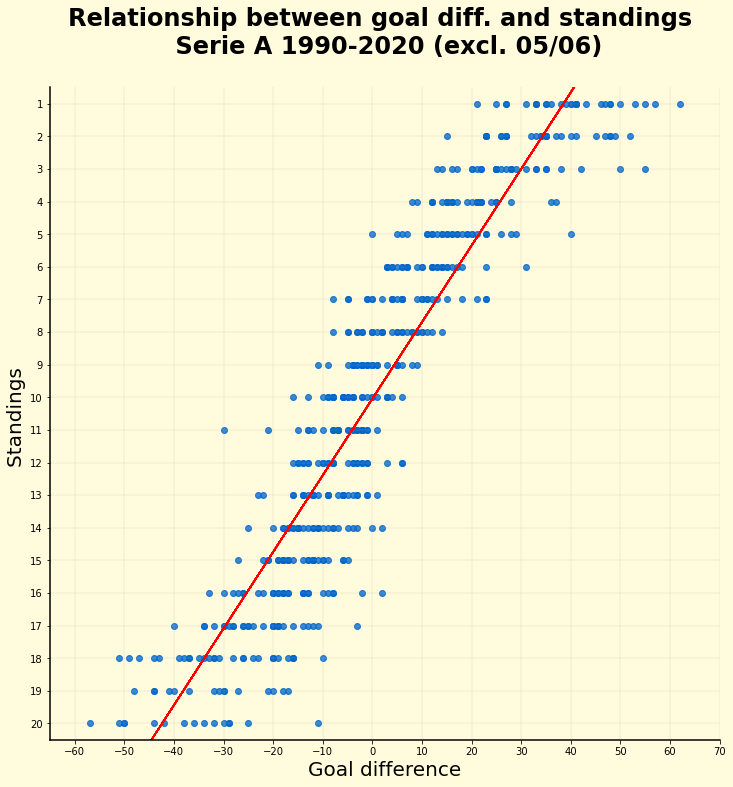

In [41]:
fig, ax = plt.subplots(figsize= (12,12), facecolor='#fffbdc')
ax.set_facecolor('#fffbdc')
plt.scatter(x,y, alpha=0.8, c="#0066cc")
plt.plot(x, y_pred, c="red")


ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.yticks(np.arange(0,21,1))
plt.xticks(np.arange(-70,71,10))

plt.ylim(0.5, 20.5)
plt.xlim(-65, 70)

plt.grid(axis = 'x', linewidth = 0.2)
plt.grid(axis = 'y', linewidth = 0.2)

plt.gca().invert_yaxis()

plt.xlabel("Goal difference", fontsize=20)
plt.ylabel("Standings ", fontsize=20)
sns.despine()
plt.title("Relationship between goal diff. and standings \n Serie A 1990-2020 (excl. 05/06)\n",fontdict= { 'fontsize': 24, 'fontweight':'bold'});